### Columns

#### People  
**ID**: Customer's unique identifier.   
**Year_Birth**: Customer's birth year.  
**Education**: Customer's education level.  
**Marital_Status**: Customer's marital status.  
**Income**: Customer's yearly household income.  
**Kidhome**: Number of children in customer's household.  
**Teenhome**: Number of teenagers in customer's household.  
**Dt_Customer**: Date of customer's enrollment with the company.  
**Recency**: Number of days since customer's last purchase.  
**Complain**: 1 if the customer complained in the last 2 years, 0 otherwise.  
#### Products   
**MntWines**: Amount spent on wine in last 2 years.  
**MntFruits**: Amount spent on fruits in last 2 years.  
**MntMeatProducts**: Amount spent on meat in last 2 years.  
**MntFishProducts**: Amount spent on fish in last 2 years.  
**MntSweetProducts**: Amount spent on sweets in last 2 years.  
**MntGoldProds**: Amount spent on gold in last 2 years.  

#### Promotion  
**NumDealsPurchases**: Number of purchases made with a discount.  
**AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.  
**AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.  
**AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.  
**AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.  
**AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.  
**Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise.  

#### Place  
**NumWebPurchases**: Number of purchases made through the company’s website.  
**NumCatalogPurchases**: Number of purchases made using a catalogue.  
**NumStorePurchases**: Number of purchases made directly in stores.  
**NumWebVisitsMonth**: Number of visits to company’s website in the last month.  

Load the [dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data). 

In [1]:
import pandas as pd
import numpy as np

# cell 2: load TSV (tab-separated) and show head
csv_path = 'marketing_campaign.csv'

# Read as tab-separated (\t).
df = pd.read_csv(csv_path, sep='\t', encoding='utf-8', low_memory=False)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
# cell 4: fill missing Income by group mean (Education + Marital Status), round stored values, and show the rows that were missing
from IPython.display import display
# find income column
income_cols = [c for c in df.columns if 'income' in c.lower()]
if not income_cols:
    raise KeyError("No column with name containing 'income' found in df.columns")
income_col = income_cols[0]
# remember which rows were missing originally
was_missing = df[income_col].isna()
missing_before = was_missing.sum()
print(f'Filling {missing_before} missing Income values (if any)')
# coerce to numeric
df[income_col] = pd.to_numeric(df[income_col], errors='coerce')
# find grouping columns (case-insensitive)
edu = next((c for c in df.columns if 'education' in c.lower()), None)
marital = next((c for c in df.columns if 'marital' in c.lower()), None)
if edu and marital:
    group_cols = [edu, marital]
    grp_mean = df.groupby(group_cols)[income_col].transform('mean')
    df[income_col] = df[income_col].fillna(grp_mean)
# fallback to overall mean for any remaining missing values
overall_mean = df[income_col].mean()
df[income_col] = df[income_col].fillna(overall_mean)
# round values in-place to nearest cent (this updates the DataFrame cells)
df[income_col] = df[income_col].round(2)
# show the rows that were originally missing, with all columns and rounded income
filled_rows = df.loc[was_missing].copy()
print(f'Rows originally missing: {len(filled_rows)}')
display(filled_rows)
# end of cell — only output is the list of filled rows as requested

Filling 24 missing Income values (if any)
Rows originally missing: 24


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,50800.26,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,51322.18,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,53314.61,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,51322.18,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,51322.18,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,46201.10,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,58138.03,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,51322.18,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,52109.01,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,58138.03,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [4]:
# cell 7: change Dt_Customer to a date datatype with format D-M-Y
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [5]:
# cell 5: show descriptive statistics for each column
for col in df.columns:
    if df[col].dtype == 'object':
        # for categorical columns
        print(f"\nStatistics for {col}:")
        print(df[col].value_counts())
    elif df[col].dtype == 'datetime64[ns]':
        # for date columns
        print(f"\nStatistics for {col}:")
        print(f"Earliest date: {df[col].min()}")
        print(f"Latest date: {df[col].max()}")
    else:
        # for numeric columns
        print(f"\nStatistics for {col}:")
        print(f"Min: {df[col].min()}")
        print(f"Max: {df[col].max()}")


Statistics for ID:
Min: 0
Max: 11191

Statistics for Year_Birth:
Min: 1893
Max: 1996

Statistics for Education:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Statistics for Marital_Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Statistics for Income:
Min: 1730.0
Max: 666666.0

Statistics for Kidhome:
Min: 0
Max: 2

Statistics for Teenhome:
Min: 0
Max: 2

Statistics for Dt_Customer:
Earliest date: 2012-07-30 00:00:00
Latest date: 2014-06-29 00:00:00

Statistics for Recency:
Min: 0
Max: 99

Statistics for MntWines:
Min: 0
Max: 1493

Statistics for MntFruits:
Min: 0
Max: 199

Statistics for MntMeatProducts:
Min: 0
Max: 1725

Statistics for MntFishProducts:
Min: 0
Max: 259

Statistics for MntSweetProducts:
Min: 0
Max: 263

Statistics for MntGoldProds:
Min: 0
Max: 362

Statist

In [6]:
# cell 6: change 'Alone', 'Absurd', and 'YOLO' values of Marital_Status to 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')

In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Select the features for plotting
# variables = df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue']]

# # Loop through each variable
# for var in variables:
#     # Check the data type
#     if variables[var].dtype == 'float64' or variables[var].dtype == 'int64':
#         # Plot a scatter plot if the variable is numerical
#         plt.scatter(df.index, variables[var])
#         plt.xlabel(var)
#         plt.ylabel('Value')
#         plt.title(f'{var} Scatter Plot')
#         plt.show()
#     elif variables[var].dtype == 'object':
#         # Plot a bar plot if the variable is categorical
#         sns.countplot(x=df[var], data=df)
#         plt.xlabel(var)
#         plt.ylabel('Count')
#         plt.title(f'{var} Bar Plot')
#         plt.show()

Remove stagnant features and the income outlier greater than $600,000/yr.

In [8]:
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

In [9]:
df = df[df['Income'] <= 600000]

K-Means Base Model

K-Means Cluster Counts:
0    1265
1     622
2     352
Name: count, dtype: int64
Silhouette Score (k=3): 0.4618


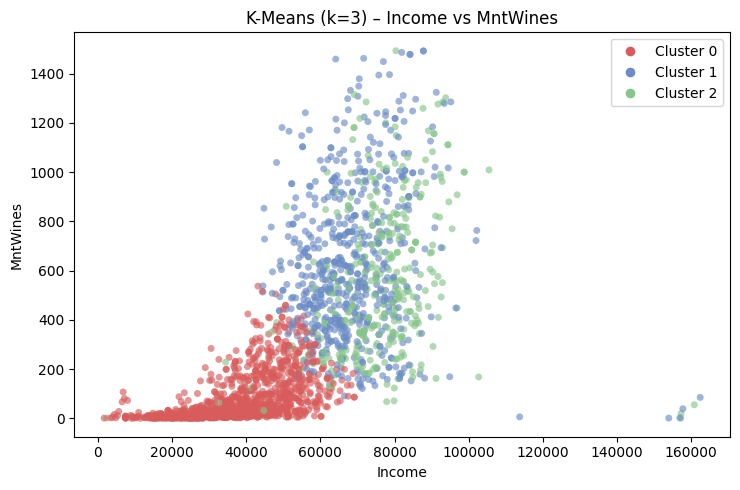


K-Means Cluster One-Liners:
Cluster 0: Higher MntFruits (+-0.9σ), MntMeatProducts (+-1.1σ); Lower MntWines (-1.4σ).
Cluster 1: Higher MntWines (+0.8σ), Income (+0.5σ); Lower MntFruits (-0.5σ).
Cluster 2: Higher MntFruits (+1.4σ), MntMeatProducts (+1.3σ); Lower MntWines (0.6σ).


In [10]:
# Simple K-Means Baseline (before hierarchical Base Model)
# Focus: quick segmentation on core spend & income features with a few concise visuals.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Core features (same set used later for hierarchical baseline to allow comparison)
km_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts']
X_km = df[km_features].dropna()

if X_km.empty:
    raise ValueError("No rows available for K-Means after dropping NA values in core features.")

# Scale
scaler_km = StandardScaler()
X_km_scaled = scaler_km.fit_transform(X_km)

# Fit K-Means (k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
km_labels = kmeans.fit_predict(X_km_scaled)

# Persist labels without overwriting other clustering results
df.loc[X_km.index, 'kmeans_cluster'] = km_labels

# Basic counts & silhouette
sil = silhouette_score(X_km_scaled, km_labels) if len(set(km_labels)) > 1 else float('nan')
print("K-Means Cluster Counts:")
print(pd.Series(km_labels).value_counts().sort_index())
print(f"Silhouette Score (k={k}): {sil:.4f}" if not np.isnan(sil) else "Silhouette Score: NaN")

# Consistent muted palette (cycle if k > 3 later)
palette = {0: '#d95c5c', 1: '#6b8cc6', 2: '#87c68a'}
colors = [palette[int(c % len(palette))] for c in km_labels]

# 1. Representative scatter: Income vs MntWines
plt.figure(figsize=(7.5, 5))
plt.scatter(X_km['Income'], X_km['MntWines'], c=colors, s=25, alpha=0.65, edgecolor='none')
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.title('K-Means (k=3) – Income vs MntWines')
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {c}',
                      markerfacecolor=palette[c], markersize=8) for c in sorted(set(km_labels))]
plt.legend(handles=handles)
plt.tight_layout()
plt.show()

# 2. Standardized centroid profile (relative across clusters)
centroids_scaled = kmeans.cluster_centers_  # already in scaled space
centroids_df = pd.DataFrame(centroids_scaled, columns=km_features)
# Z-standardize centroids across clusters feature-wise for interpretability
centroids_z = (centroids_df - centroids_df.mean(axis=0)) / centroids_df.std(axis=0, ddof=0)
centroids_z['cluster'] = centroids_z.index
profile_long = centroids_z.melt(id_vars='cluster', var_name='feature', value_name='z_score')

# 4. One-line summaries (top & bottom features per cluster)
print("\nK-Means Cluster One-Liners:")
for c in centroids_z['cluster']:
    row = centroids_z.loc[c, km_features]
    top2 = row.sort_values(ascending=False).head(2)
    low1 = row.sort_values(ascending=True).head(1)
    hi_txt = ', '.join([f"{f} (+{v:.1f}σ)" for f, v in top2.items()])
    lo_txt = ', '.join([f"{f} ({v:.1f}σ)" for f, v in low1.items()])
    print(f"Cluster {c}: Higher {hi_txt}; Lower {lo_txt}.")


Agglomerative Hierarchical Clustering Base Model

Cluster counts:
cluster
0.0     510
1.0    1210
2.0     519
Name: count, dtype: int64


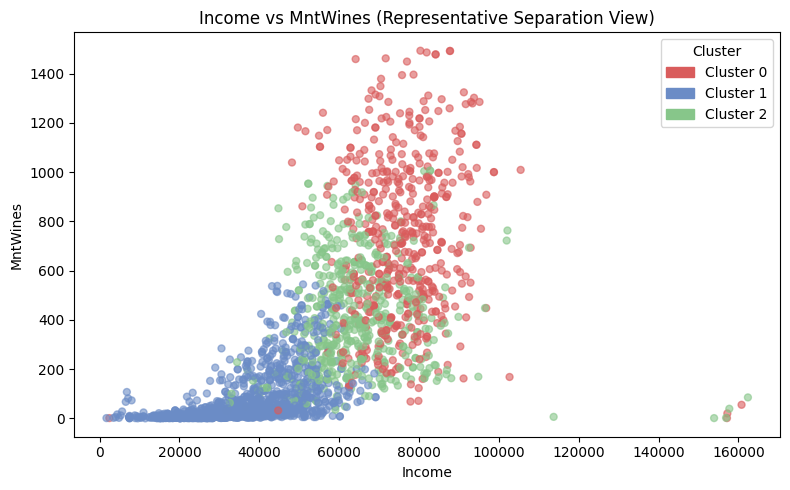

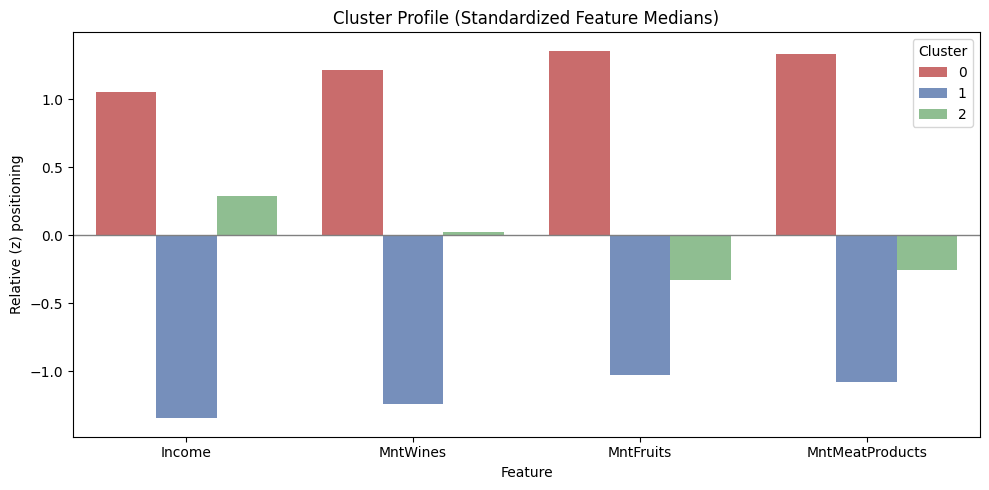


Cluster Profile One-Liners:
 - Cluster 0: Higher MntFruits (+1.4σ), MntMeatProducts (+1.3σ); Lower Income (1.1σ).
 - Cluster 1: Higher MntFruits (+-1.0σ), MntMeatProducts (+-1.1σ); Lower Income (-1.3σ).
 - Cluster 2: Higher Income (+0.3σ), MntWines (+0.0σ); Lower MntFruits (-0.3σ).

Raw Median Profiles:
          Income  MntWines  MntFruits  MntMeatProducts  n_customers
cluster                                                            
0        75495.5     728.5       68.0            414.5          510
1        36804.5      28.0        3.0             17.0         1210
2        63206.0     390.0       22.0            153.0          519


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import numpy as np

# Base Model: cluster on four core features
features = ['Income','MntWines','MntFruits','MntMeatProducts']
X = df[features].dropna()

# Scale + cluster
X_scaled = StandardScaler().fit_transform(X)
labels = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X_scaled)
df.loc[X.index, 'cluster'] = labels

print('Cluster counts:')
print(df.loc[X.index, 'cluster'].value_counts().sort_index())

# Muted palette
palette = {0: '#d95c5c', 1: '#6b8cc6', 2: '#87c68a'}
point_colors = [palette[int(c)] for c in labels]

# --- Single representative scatter plot (Income vs MntWines) --- #
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X['Income'], X['MntWines'], c=point_colors, s=25, alpha=0.6)
ax.set_xlabel('Income')
ax.set_ylabel('MntWines')
ax.set_title('Income vs MntWines (Representative Separation View)')
handles = [mpatches.Patch(color=palette[k], label=f'Cluster {k}') for k in sorted(palette)]
ax.legend(handles=handles, title='Cluster')
plt.tight_layout()
plt.show()

# ---------------- Business Readout Angle Additions ---------------- #
# 1. Cluster profile (median) + standardized (z across clusters per feature)
cluster_medians = X.assign(cluster=labels).groupby('cluster')[features].median()
# Standardize the medians feature-wise to highlight relative positioning
cluster_medians_z = (cluster_medians - cluster_medians.mean(axis=0)) / cluster_medians.std(axis=0, ddof=0)

# Long-form for plotting grouped bars: feature vs z-score per cluster
profile_long = cluster_medians_z.reset_index().melt(id_vars='cluster', var_name='feature', value_name='z_score')

plt.figure(figsize=(10, 5))
sns.barplot(data=profile_long, x='feature', y='z_score', hue='cluster', palette=[palette[c] for c in sorted(cluster_medians_z.index)])
plt.axhline(0, color='gray', linewidth=1)
plt.title('Cluster Profile (Standardized Feature Medians)')
plt.ylabel('Relative (z) positioning')
plt.xlabel('Feature')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# 2. One-liner summaries per cluster (based on highest/lowest z-scores)
summary_lines = []
for c in cluster_medians_z.index:
    z_row = cluster_medians_z.loc[c]
    top_pos = z_row.sort_values(ascending=False).head(2)
    top_neg = z_row.sort_values(ascending=True).head(1)
    positives = ', '.join([f"{feat} (+{val:.1f}σ)" for feat, val in top_pos.items()])
    negatives = ', '.join([f"{feat} ({val:.1f}σ)" for feat, val in top_neg.items()])
    line = f"Cluster {c}: Higher {positives}; Lower {negatives}." if negatives else f"Cluster {c}: Higher {positives}."
    summary_lines.append(line)

print('\nCluster Profile One-Liners:')
for l in summary_lines:
    print(' - ' + l)

# 3. Optional: tabular profile for quick export
profile_table = cluster_medians.copy()
profile_table['n_customers'] = pd.Series(labels).value_counts().sort_index()
print('\nRaw Median Profiles:')
print(profile_table)
# ------------------------------------------------------------------ #

Encode Categorical Features

In [12]:
# One-Hot Encode categorical features + scale numeric features (replaces prior LabelEncoder approach)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

# Define categorical & numeric columns explicitly (fallbacks if names differ slightly)
possible_cats = ['Education', 'Marital_Status']
categorical_cols = [c for c in possible_cats if c in df.columns]

# Exclude ID-like and date columns from numeric feature list
exclude_cols = set(categorical_cols + ['ID', 'Dt_Customer'])
numeric_cols = [c for c in df.columns if c not in exclude_cols and pd.api.types.is_numeric_dtype(df[c])]

# Drop rows with any NaN in the numeric columns we intend to use (keeps indexing for alignment)
rows_before = df.shape[0]
clean_mask = df[numeric_cols].notna().all(axis=1)
if categorical_cols:
    clean_mask &= df[categorical_cols].notna().all(axis=1)
filtered_df = df.loc[clean_mask].copy()
rows_after = filtered_df.shape[0]
print(f"Rows retained after NA filtering: {rows_after}/{rows_before}")

# Build preprocessing transformer (OneHot for categoricals, scale numeric)
try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:  # Older sklearn versions
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', ohe, categorical_cols)
    ],
    remainder='drop'
)

X_preprocessed = preprocessor.fit_transform(filtered_df)

# Retrieve feature names (numeric first, then expanded categorical)
feature_names = []
feature_names.extend(numeric_cols)
if categorical_cols:
    cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    feature_names.extend(cat_feature_names.tolist())

print(f"Total engineered features: {len(feature_names)}")
print("First 10 feature names:", feature_names[:10])
print("Preprocessed matrix shape:", X_preprocessed.shape)

# Persist for downstream steps
encoded_index = filtered_df.index  # store index alignment
X_feature_names = feature_names  # canonical list for subsequent selection steps

Rows retained after NA filtering: 2239/2239
Total engineered features: 35
First 10 feature names: ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']
Preprocessed matrix shape: (2239, 35)


In [13]:
# Preprocessing summary after One-Hot + scaling (pipeline stage)
if 'X_preprocessed' in globals():
    print(f"Numeric columns used: {len(numeric_cols)} -> {numeric_cols[:8]}{'...' if len(numeric_cols)>8 else ''}")
    print(f"Categorical columns (one-hot encoded): {categorical_cols}")
    print(f"Preprocessed feature matrix shape: {X_preprocessed.shape}")
else:
    print("Run the One-Hot encoding cell first to generate X_preprocessed.")

Numeric columns used: 25 -> ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts']...
Categorical columns (one-hot encoded): ['Education', 'Marital_Status']
Preprocessed feature matrix shape: (2239, 35)


In [14]:
# Unsupervised feature selection: variance filtering, correlation pruning, optional PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

if 'X_preprocessed' not in globals():
    raise RuntimeError("Expected X_preprocessed from prior cell. Run the encoding cell first.")

# 1. Variance Threshold (remove near-constant features)
var_thresh = 1e-4  # very low; adjust if many one-hot columns are constant
vt = VarianceThreshold(threshold=var_thresh)
X_var = vt.fit_transform(X_preprocessed)
kept_mask_var = vt.get_support()
var_feature_names = [n for n, keep in zip(X_feature_names, kept_mask_var) if keep]
print(f"Variance step: {len(var_feature_names)}/{len(X_feature_names)} features retained")

# 2. Correlation pruning (on numeric representation; treat all as numeric now)
# Compute correlation on the retained features
X_var_df = pd.DataFrame(X_var, columns=var_feature_names, index=encoded_index)
cor_matrix = X_var_df.corr(numeric_only=True).abs()
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
cor_threshold = 0.90  # drop one of any pair with |corr| >= this
high_correlated = [column for column in upper.columns if any(upper[column] >= cor_threshold)]
pruned_features = [f for f in var_feature_names if f not in high_correlated]
X_pruned = X_var_df[pruned_features].values
print(f"Correlation step: {len(pruned_features)}/{len(var_feature_names)} features retained (removed {len(high_correlated)} high-corr features)")

# 3. Optional PCA for dimensionality reduction while preserving variance
apply_pca = True
pca_variance_target = 0.90  # keep components explaining 90% variance
if apply_pca and X_pruned.shape[1] > 2:
    pca = PCA(n_components=pca_variance_target, svd_solver='full', random_state=42)
    X_reduced = pca.fit_transform(X_pruned)
    print(f"PCA reduced dimensionality from {X_pruned.shape[1]} to {X_reduced.shape[1]} components (90% variance)")
    print("Explained variance ratios (first 10):", np.round(pca.explained_variance_ratio_[:10], 4))
    feature_space_description = 'pca_components'
else:
    pca = None
    X_reduced = X_pruned
    feature_space_description = 'pruned_features'
    print("PCA skipped (insufficient features or disabled)")

# Summary
print("Final feature matrix shape:", X_reduced.shape)

# Persist artifacts for clustering stage
X_final = X_reduced  # numeric matrix for clustering
selected_original_features = pruned_features  # names prior to PCA
pca_model = pca

# Quick sanity check: variance of each final dimension
print("Per-dimension variance (first 10):", np.var(X_final, axis=0)[:10])

Variance step: 35/35 features retained
Correlation step: 35/35 features retained (removed 0 high-corr features)
PCA reduced dimensionality from 35 to 20 components (90% variance)
Explained variance ratios (first 10): [0.2876 0.0825 0.0729 0.0537 0.0422 0.0388 0.038  0.0366 0.0319 0.0292]
Final feature matrix shape: (2239, 20)
Per-dimension variance (first 10): [7.58893773 2.17736296 1.92416034 1.4169377  1.11288668 1.02411559
 1.003493   0.96693327 0.84220187 0.77091747]


Feature Selection with Silhouette Score

In [15]:
# Centralize feature engineering artifacts so downstream models never reconstruct pieces
# Run this immediately after feature selection (depends on X_preprocessed, encoded_index, X_feature_names,
# X_pruned, pruned_features, selected_original_features, X_final, pca_model)
import pandas as pd
import numpy as np

required_vars = [
    'X_preprocessed','encoded_index','X_feature_names',
    'X_pruned','pruned_features','selected_original_features',
    'X_final','pca_model'
]
missing = [v for v in required_vars if v not in globals()]
if missing:
    raise RuntimeError(f"Missing required artifacts for centralization: {missing}. Ensure prior cells executed.")

feature_artifacts = {
    'X_preprocessed': X_preprocessed,                 # full numeric matrix after one-hot + scaling
    'encoded_index': encoded_index,                   # index alignment to original df
    'feature_names_full': X_feature_names,            # names for X_preprocessed columns
    'X_pruned': X_pruned,                             # variance + correlation filtered matrix
    'pruned_features': pruned_features,               # names retained after pruning
    'selected_original_features': selected_original_features,  # alias (pre-PCA)
    'X_final': X_final,                               # matrix actually used for "advanced" model (post optional PCA)
    'pca_model': pca_model,                           # PCA object or None
    'pca_applied': pca_model is not None,             # boolean convenience flag
    'n_final_dims': X_final.shape[1],                 # dimensionality fed to clustering
}

# Lightweight integrity checks
shape_checks = {
    'X_preprocessed_rows_match_index': (len(feature_artifacts['encoded_index']) == feature_artifacts['X_preprocessed'].shape[0]),
    'X_pruned_rows_match_index': (len(feature_artifacts['encoded_index']) == feature_artifacts['X_pruned'].shape[0]),
    'X_final_rows_match_index': (len(feature_artifacts['encoded_index']) == feature_artifacts['X_final'].shape[0]),
}

print('Feature artifact keys:', sorted(feature_artifacts.keys()))
print('Integrity checks:', shape_checks)
if not all(shape_checks.values()):
    print('\nWARNING: Row alignment mismatch detected — downstream joins on index may misalign.')
else:
    print('All row alignment checks passed.')

# Preview a concise summary
summary = {
    'full_features': len(feature_artifacts['feature_names_full']),
    'pruned_features': len(feature_artifacts['pruned_features']),
    'final_dimensions': feature_artifacts['n_final_dims'],
    'pca_applied': feature_artifacts['pca_applied'],
}
print('Artifact summary:', summary)

Feature artifact keys: ['X_final', 'X_preprocessed', 'X_pruned', 'encoded_index', 'feature_names_full', 'n_final_dims', 'pca_applied', 'pca_model', 'pruned_features', 'selected_original_features']
Integrity checks: {'X_preprocessed_rows_match_index': True, 'X_pruned_rows_match_index': True, 'X_final_rows_match_index': True}
All row alignment checks passed.
Artifact summary: {'full_features': 35, 'pruned_features': 35, 'final_dimensions': 20, 'pca_applied': True}


Agglomerative Hierarchical Clustering Improved Model

In [16]:
# Clustering utility: fit agglomerative, order clusters by median income, compute metrics via unified helper
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

# Requires compute_cluster_metrics defined in metrics helper cell

def _order_by_income(df, labels, index, income_col='Income'):
    """Return ordered_labels (relabelled 0..k-1 ascending by median income) and order_map.
    If income_col missing or all NaN, returns original labels and identity map."""
    if income_col not in df.columns:
        return labels, {c: c for c in np.unique(labels)}
    sub = df.loc[index, [income_col]].copy()
    sub['__lab'] = labels
    sub = sub.dropna(subset=[income_col])
    if sub.empty:
        return labels, {c: c for c in np.unique(labels)}
    med = sub.groupby('__lab')[income_col].median().sort_values()
    order_map = {old: new for new, old in enumerate(med.index.tolist())}
    ordered_labels = np.array([order_map[l] for l in labels])
    return ordered_labels, order_map

def cluster_agglomerative(X, k, index, df, linkage='ward', income_col='Income'):
    """Unified agglomerative clustering pipeline.
    Parameters:
      X: ndarray (n_samples, n_features)
      k: int number of clusters
      index: index aligning rows back to df
      df: original dataframe (used only for ordering & income based ordering)
      linkage: 'ward' | 'complete' | 'average' | 'single'
      income_col: name of income column for ordering
    Returns dict with standardized keys for downstream artifact schema.
    Keys: model, raw_labels, ordered_labels, order_map, metrics (dict), k, linkage
    """
    if k <= 1:
        raise ValueError("k must be >=2 for meaningful clustering")
    if X.shape[0] < k:
        raise ValueError(f"Cannot cluster into k={k} with only {X.shape[0]} samples")
    model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    raw_labels = model.fit_predict(X)
    ordered_labels, order_map = _order_by_income(df, raw_labels, index, income_col=income_col)
    metrics = compute_cluster_metrics(X, ordered_labels)
    return {
        'model': model,
        'raw_labels': raw_labels,
        'ordered_labels': ordered_labels,
        'order_map': order_map,
        'metrics': metrics,
        'k': k,
        'linkage': linkage
    }

print("Clustering utility 'cluster_agglomerative' ready (fit, order, metrics). Standardized schema in place.")

Clustering utility 'cluster_agglomerative' ready (fit, order, metrics). Standardized schema in place.


In [17]:
# Shared plotting helpers: projection, z-profile (bar + heatmap), income boxplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, Iterable, Tuple, Optional

def build_palette(labels: Iterable[int]) -> Dict[int, str]:
    base = ['#d95c5c','#6b8cc6','#87c68a','#c29dda','#8fb8de','#b4d3a7','#f2b880','#9ad9d3']
    unique_c = sorted(np.unique(labels))
    return {c: base[i % len(base)] for i, c in enumerate(unique_c)}

def plot_projection(X: np.ndarray,
                    labels: Iterable[int],
                    pca_model: Optional[object],
                    title: str,
                    palette: Dict[int,str],
                    force_2d_vis: bool = True) -> Tuple[np.ndarray, str, str]:
    """Plot a 2D projection.
    If X has >=2 dims, use first two (PC1/PC2 if pca_model not None). If 1 dim, duplicate axis.
    If force_2d_vis and a PCA model isn't provided but X has >2 dims, still just take first two dims.
    Returns (proj_array, xlabel, ylabel)."""
    X = np.asarray(X)
    labels = np.asarray(labels)
    if X.shape[1] >= 2:
        proj = X[:, :2]
        xlabel = 'PC1' if (pca_model is not None) else 'Dim1'
        ylabel = 'PC2' if (pca_model is not None) else 'Dim2'
    else:
        proj = np.column_stack([X[:,0], np.zeros_like(X[:,0])])
        xlabel, ylabel = 'Dim1', 'Zero'
    plt.figure(figsize=(8,6))
    for c in sorted(np.unique(labels)):
        mask = labels == c
        plt.scatter(proj[mask,0], proj[mask,1], s=20, alpha=0.65, c=palette.get(c, '#999999'), label=f"Cluster {c}")
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title)
    plt.legend(title='Cluster'); plt.tight_layout(); plt.show()
    return proj, xlabel, ylabel

def plot_income_boxplot(df: pd.DataFrame,
                        label_col: str,
                        income_col: str,
                        palette: Dict[int,str],
                        title: str):
    if label_col not in df.columns or income_col not in df.columns:
        print(f"Skipping income plot: '{label_col}' or '{income_col}' missing.")
        return
    subset = df[[label_col, income_col]].dropna()
    if subset.empty:
        print("Skipping income plot: no non-null rows.")
        return
    subset[label_col] = subset[label_col].astype(int)
    plt.figure(figsize=(8,4))
    sns.boxplot(data=subset, x=label_col, y=income_col, hue=label_col, dodge=False,
                palette=palette, legend=False)
    if plt.gca().legend_ is not None:
        plt.gca().legend_.remove()
    plt.xlabel('Ordered Cluster'); plt.ylabel('Income'); plt.title(title)
    plt.tight_layout(); plt.show()

def plot_cluster_profile(pruned_matrix: np.ndarray,
                         feature_names: Iterable[str],
                         labels: Iterable[int],
                         title_prefix: str,
                         palette: Dict[int,str],
                         max_bar_features: Optional[int] = None) -> pd.DataFrame:
    """Compute cluster medians in original (pruned) feature space, z-standardize across clusters per feature,
    and plot both the bar (long form) and a heatmap. Returns z-standardized medians DataFrame."""
    labels = np.asarray(labels)
    pruned_df = pd.DataFrame(pruned_matrix, columns=list(feature_names))
    pruned_df['__cluster_ord'] = labels
    cluster_meds = pruned_df.groupby('__cluster_ord').median()
    cluster_meds_z = (cluster_meds - cluster_meds.mean(axis=0)) / cluster_meds.std(axis=0, ddof=0)
    long_df = cluster_meds_z.reset_index().melt(id_vars='__cluster_ord', var_name='feature', value_name='z_score')
    # Optionally limit number of features for bar plot for readability
    if max_bar_features and cluster_meds_z.shape[1] > max_bar_features:
        # choose features with highest variance across clusters
        feat_var = cluster_meds_z.var(axis=0).sort_values(ascending=False)
        keep = feat_var.head(max_bar_features).index
        long_df = long_df[long_df['feature'].isin(keep)]
    plt.figure(figsize=(min(14, 0.55*len(cluster_meds_z.columns)+4), 5))
    sns.barplot(data=long_df, x='feature', y='z_score', hue='__cluster_ord',
                palette=[palette[c] for c in sorted(cluster_meds_z.index)])
    plt.axhline(0, color='gray', linewidth=1)
    plt.title(f'{title_prefix} (Z of Feature Medians)')
    plt.ylabel('Relative (z) positioning'); plt.xlabel('Feature')
    plt.legend(title='Cluster', bbox_to_anchor=(1.02,1), loc='upper left')
    plt.xticks(rotation=60, ha='right'); plt.tight_layout(); plt.show()
    # Heatmap
    plt.figure(figsize=(min(12, 0.45*cluster_meds_z.shape[1]+3), 3 + 0.4*cluster_meds_z.shape[0]))
    sns.heatmap(cluster_meds_z, cmap='coolwarm', center=0, annot=False, cbar_kws={'label':'z-score'})
    plt.title(f'{title_prefix} Heatmap (Z-Standardized)')
    plt.ylabel('Ordered Cluster'); plt.xlabel('Feature')
    plt.tight_layout(); plt.show()
    return cluster_meds_z

print("Shared plotting helpers loaded: build_palette, plot_projection, plot_income_boxplot, plot_cluster_profile")

Shared plotting helpers loaded: build_palette, plot_projection, plot_income_boxplot, plot_cluster_profile


In [18]:
# Unified one-liner summary helpers
import numpy as np
import pandas as pd
from typing import List, Iterable, Tuple

def compute_cluster_z_medians(matrix, labels: Iterable[int], feature_names: Iterable[str]) -> pd.DataFrame:
    """Compute cluster medians and z-standardize across clusters per feature.
    Returns DataFrame indexed by ordered cluster labels with z-scores."""
    labels = np.asarray(labels)
    df_mat = pd.DataFrame(matrix, columns=list(feature_names))
    df_mat['__cluster'] = labels
    med = df_mat.groupby('__cluster').median()
    # avoid division by zero (constant features) -> replace std 0 with 1 so z=0
    std = med.std(axis=0, ddof=0).replace(0, 1)
    z = (med - med.mean(axis=0)) / std
    return z

def generate_cluster_one_liners(z_medians: pd.DataFrame,
                                 top_positive: int = 2,
                                 top_negative: int = 1,
                                 positive_prefix: str = 'Higher',
                                 negative_prefix: str = 'Lower') -> List[str]:
    """Generate concise textual summaries per cluster.
    Example: "Cluster 0: Higher Income (+1.2σ), MntWines (+0.8σ); Lower Recency (-0.6σ)."
    If a feature appears in both top_positive and top_negative lists due to small count, it is deduped.
    """
    lines = []
    for c in z_medians.index:
        row = z_medians.loc[c]
        pos = row.sort_values(ascending=False).head(top_positive)
        neg = row.sort_values(ascending=True).head(top_negative)
        pos_txt = ', '.join([f"{f} (+{v:.1f}σ)" for f, v in pos.items()]) if len(pos) else ''
        neg_txt = ', '.join([f"{f} ({v:.1f}σ)" for f, v in neg.items()]) if len(neg) else ''
        if pos_txt and neg_txt:
            line = f"Cluster {c}: {positive_prefix} {pos_txt}; {negative_prefix} {neg_txt}."
        elif pos_txt:
            line = f"Cluster {c}: {positive_prefix} {pos_txt}."
        elif neg_txt:
            line = f"Cluster {c}: {negative_prefix} {neg_txt}."
        else:
            line = f"Cluster {c}: (no distinguishing features)"
        lines.append(line)
    return lines

print("Unified one-liner helpers ready: compute_cluster_z_medians, generate_cluster_one_liners")

Unified one-liner helpers ready: compute_cluster_z_medians, generate_cluster_one_liners


In [19]:
# Unified clustering metrics helper (single source)
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np
from typing import Dict, Any

def compute_cluster_metrics(X, labels) -> Dict[str, Any]:
    """Return clustering quality metrics safely.
    If clusters are degenerate ( <2 unique or samples <= clusters ), returns NaNs.
    Metrics:
      silhouette (higher better)
      davies_bouldin (lower better)
      calinski_harabasz (higher better)
    """
    X = np.asarray(X)
    labels = np.asarray(labels)
    unique = np.unique(labels)
    if X.shape[0] == 0 or len(unique) < 2 or X.shape[0] <= len(unique):
        return {
            'silhouette': float('nan'),
            'davies_bouldin': float('nan'),
            'calinski_harabasz': float('nan')
        }
    try:
        sil = silhouette_score(X, labels)
    except Exception:
        sil = float('nan')
    try:
        db = davies_bouldin_score(X, labels)
    except Exception:
        db = float('nan')
    try:
        ch = calinski_harabasz_score(X, labels)
    except Exception:
        ch = float('nan')
    return {
        'silhouette': sil,
        'davies_bouldin': db,
        'calinski_harabasz': ch
    }

print("Unified metrics helper loaded: compute_cluster_metrics()")

Unified metrics helper loaded: compute_cluster_metrics()


Advanced Model Metrics (k=3):
  Silhouette: 0.1938
  Davies-Bouldin: 2.1620
  Calinski-Harabasz: 454.89
Cluster size distribution (ordered):
0    1270
1     432
2     537
Name: count, dtype: int64


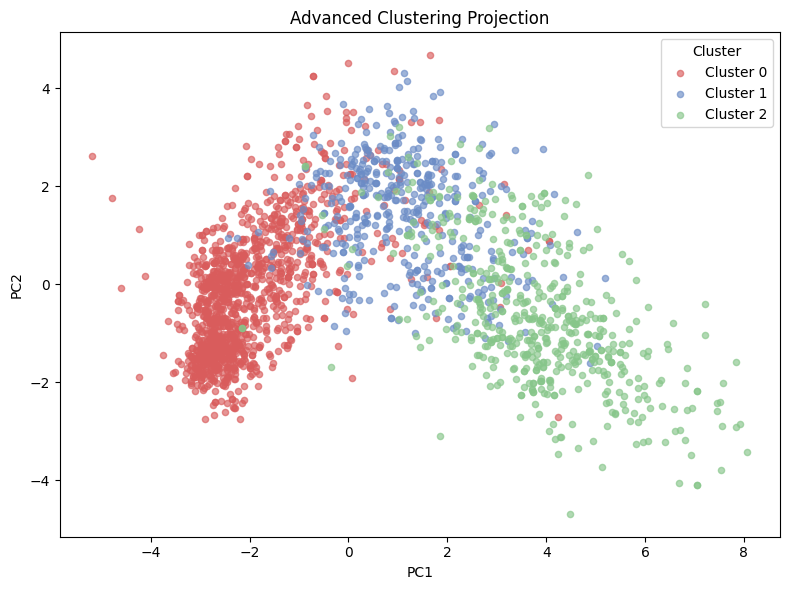

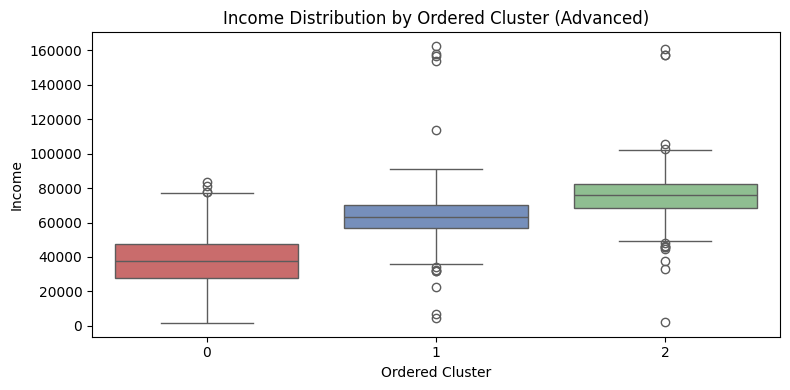


Cluster One-Liners:
 - Cluster 0: Higher Kidhome (+1.4σ), NumWebVisitsMonth (+1.4σ); Lower NumStorePurchases (-1.4σ).
 - Cluster 1: Higher cluster (+1.2σ), Recency (+1.2σ); Lower Year_Birth (-1.2σ).
 - Cluster 2: Higher MntFruits (+1.3σ), MntMeatProducts (+1.3σ); Lower Teenhome (-1.4σ).

Advanced artifacts stored (standardized schema with 'metrics' + 'one_liners').


In [20]:
# Advanced Model: Agglomerative clustering using utilities + shared plotting + one-liner helpers (standardized artifact schema)
import numpy as np
import pandas as pd

needed_helpers = ['feature_artifacts','cluster_agglomerative','build_palette','plot_projection','plot_income_boxplot','plot_cluster_profile','compute_cluster_z_medians','generate_cluster_one_liners']
for h in needed_helpers:
    if h not in globals():
        raise RuntimeError(f"Missing helper '{h}'. Run prerequisite cells.")

X_final = feature_artifacts['X_final']
pca_model = feature_artifacts['pca_model']
selected_original_features = feature_artifacts['selected_original_features']
encoded_index = feature_artifacts['encoded_index']

result = cluster_agglomerative(X_final, k=3, index=encoded_index, df=df, linkage='ward')
ordered_labels = result['ordered_labels']
raw_labels = result['raw_labels']
metrics = result['metrics']

# Persist labels
df['advanced_cluster'] = np.nan
df.loc[encoded_index, 'advanced_cluster'] = raw_labels

df['advanced_cluster_ordered'] = np.nan
df.loc[encoded_index, 'advanced_cluster_ordered'] = ordered_labels

print(f"Advanced Model Metrics (k={result['k']}):")
print(f"  Silhouette: {metrics['silhouette']:.4f}" if not np.isnan(metrics['silhouette']) else "  Silhouette: NaN")
print(f"  Davies-Bouldin: {metrics['davies_bouldin']:.4f}" if not np.isnan(metrics['davies_bouldin']) else "  Davies-Bouldin: NaN")
print(f"  Calinski-Harabasz: {metrics['calinski_harabasz']:.2f}" if not np.isnan(metrics['calinski_harabasz']) else "  Calinski-Harabasz: NaN")
print("Cluster size distribution (ordered):")
print(pd.Series(ordered_labels).value_counts().sort_index())

# Projection
palette = build_palette(ordered_labels)
_, xlabel, ylabel = plot_projection(X_final, ordered_labels, pca_model, title='Advanced Clustering Projection', palette=palette)

# Income distribution
plot_income_boxplot(df, 'advanced_cluster_ordered', 'Income', palette, title='Income Distribution by Ordered Cluster (Advanced)')

# One-liners derived from pruned feature space (better comparability) if available
if 'X_pruned' in feature_artifacts and 'pruned_features' in feature_artifacts:
    X_pruned_local = feature_artifacts['X_pruned']
    z_meds = compute_cluster_z_medians(X_pruned_local, ordered_labels, feature_artifacts['pruned_features'])
    lines = generate_cluster_one_liners(z_meds, top_positive=2, top_negative=1)
    print('\nCluster One-Liners:')
    for line in lines:
        print(' - ' + line)
else:
    lines = []
    print('\nSkipping one-liners: pruned feature space not in feature_artifacts.')

advanced_artifacts = {
    'model': result['model'],
    'labels': ordered_labels,
    'n_clusters': result['k'],
    'metrics': metrics,  # standardized metrics dict
    'feature_space': 'pca' if pca_model is not None else 'pruned',
    'original_features_used': selected_original_features,
    'pca_components': pca_model.n_components_ if pca_model is not None else None,
    'order_map': result['order_map'],
    'projection_labels': {'x': xlabel, 'y': ylabel},
    'one_liners': lines
}
print("\nAdvanced artifacts stored (standardized schema with 'metrics' + 'one_liners').")

=== Top Configurations (by silhouette) ===
representation  k  components  silhouette  davies_bouldin  calinski_harabasz
         pca_2  3         2.0    0.518457        0.690292        3909.265588
         pca_2  2         2.0    0.503068        0.709813        2502.990258
         pca_3  2         3.0    0.474860        0.882066        2213.865553
         pca_2  4         2.0    0.468721        0.825545        3438.484364
         pca_3  4         3.0    0.421132        0.922804        1718.050388
         pca_5  2         5.0    0.405378        1.067748        1282.179686
         pca_3  3         3.0    0.403235        1.069963        1823.442112
         pca_2  5         2.0    0.402543        0.859282        3309.177522
         pca_2  6         2.0    0.351685        0.883159        3329.314204
        pca_10  2        10.0    0.346430        1.389213         920.429101

Chosen configuration:
representation             pca_2
k                              3
components           

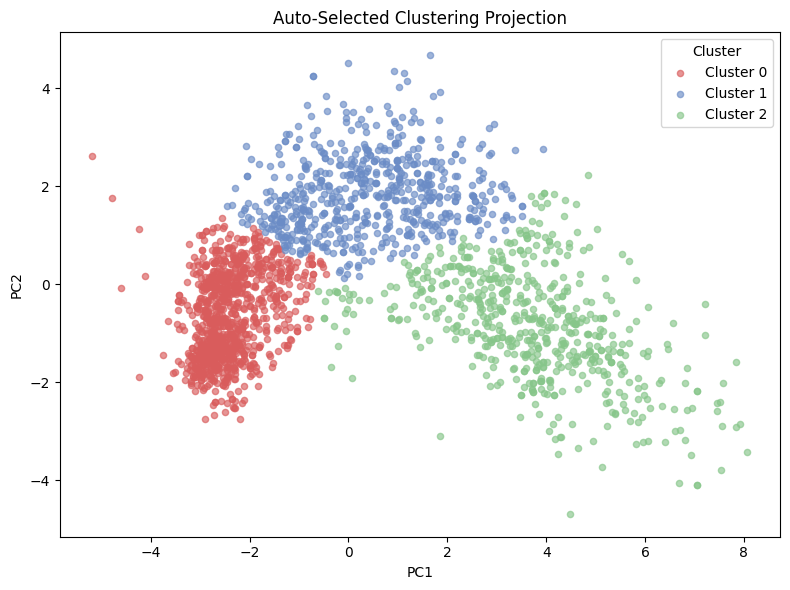

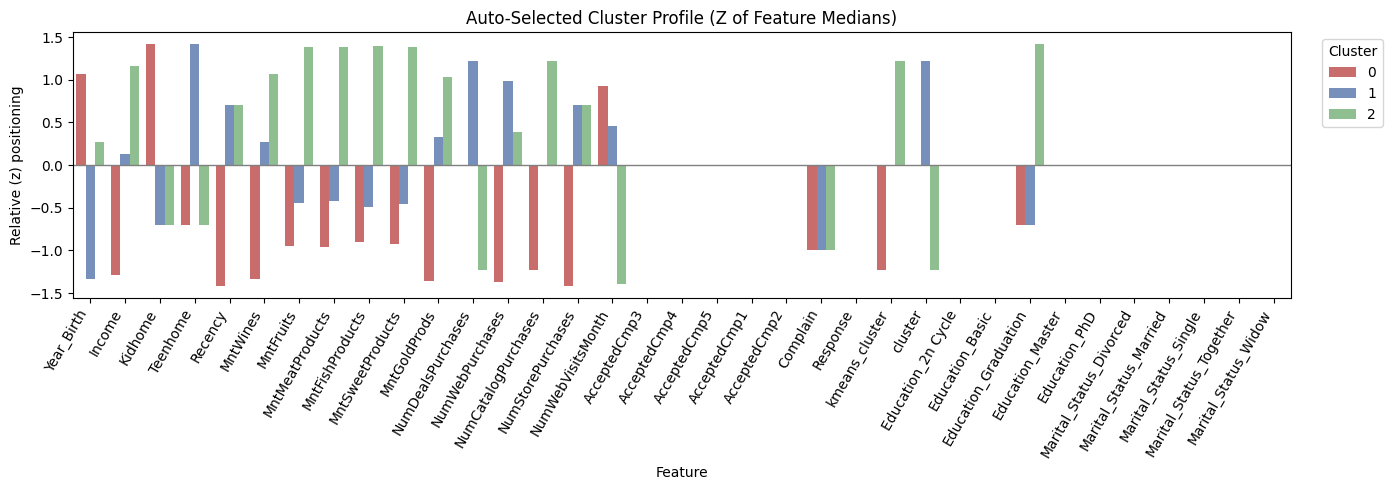

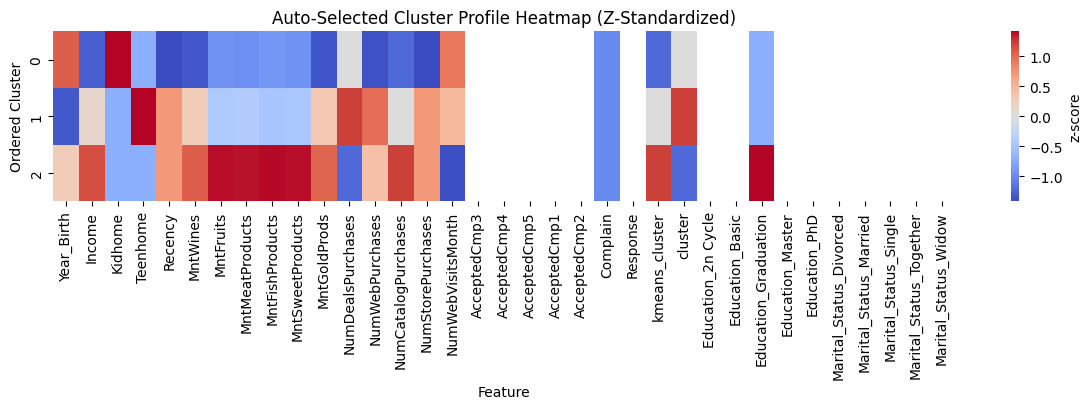

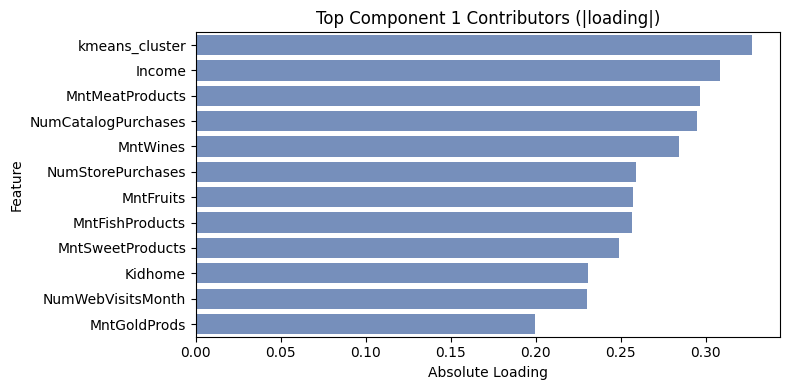

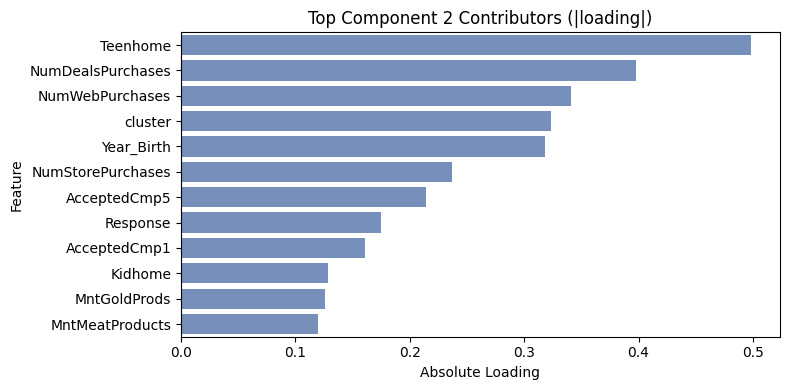

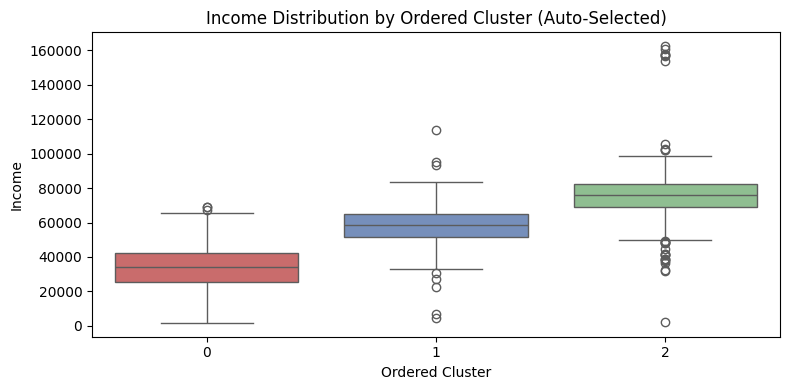


Cluster One-Liners:
 - Cluster 0: Higher Kidhome (+1.4σ), Year_Birth (+1.1σ); Lower NumStorePurchases (-1.4σ).
 - Cluster 1: Higher Teenhome (+1.4σ), cluster (+1.2σ); Lower Year_Birth (-1.3σ).
 - Cluster 2: Higher Education_Graduation (+1.4σ), MntFishProducts (+1.4σ); Lower NumWebVisitsMonth (-1.4σ).

Artifacts stored in advanced_auto_artifacts (standardized schema with 'metrics' + 'one_liners'). Evaluation table via advanced_auto_artifacts['evaluation_table'].head().


In [21]:
# Auto-Selected Hierarchical Clustering (utilities + shared plotting + unified one-liners + standardized metrics schema)
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

needed_helpers = ['feature_artifacts','cluster_agglomerative','build_palette','plot_projection','plot_income_boxplot','plot_cluster_profile','compute_cluster_z_medians','generate_cluster_one_liners','compute_cluster_metrics']
for h in needed_helpers:
    if h not in globals():
        raise RuntimeError(f"Missing helper '{h}'. Run prerequisite cells.")

X_pruned = feature_artifacts['X_pruned']
pruned_features = feature_artifacts['pruned_features']
encoded_index = feature_artifacts['encoded_index']

linkage_method = 'ward'
random_state = 42
candidate_k = [2,3,4,5,6]
pca_components_grid = [None, 2, 3, 5, 10]

n_samples = X_pruned.shape[0]
candidate_k = [k for k in candidate_k if k < n_samples]
if not candidate_k:
    raise RuntimeError("No feasible k values (< n_samples).")

records = []
max_dims = X_pruned.shape[1]
for comps in pca_components_grid:
    if comps is None:
        X_space = X_pruned
        rep_tag = 'raw_pruned'
        pca_tmp = None
    else:
        if comps > max_dims or comps < 2:
            continue
        pca_tmp = PCA(n_components=comps, svd_solver='full', random_state=random_state)
        X_space = pca_tmp.fit_transform(X_pruned)
        rep_tag = f'pca_{comps}'
    for k in candidate_k:
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage_method)
        labels = model.fit_predict(X_space)
        met = compute_cluster_metrics(X_space, labels)
        records.append({
            'representation': rep_tag,
            'k': k,
            'components': (None if rep_tag == 'raw_pruned' else comps),
            'silhouette': met['silhouette'],
            'davies_bouldin': met['davies_bouldin'],
            'calinski_harabasz': met['calinski_harabasz']
        })

eval_df = pd.DataFrame(records)
if eval_df.empty:
    raise RuntimeError("No evaluation results produced.")

eval_df['r_sil'] = (-eval_df['silhouette']).rank(method='min')
eval_df['r_db']  = (eval_df['davies_bouldin']).rank(method='min')
eval_df['r_ch']  = (-eval_df['calinski_harabasz']).rank(method='min')
eval_df['composite_rank'] = eval_df[['r_sil','r_db','r_ch']].sum(axis=1)

best = eval_df.sort_values(['composite_rank','r_sil','r_db','r_ch']).iloc[0]
print("=== Top Configurations (by silhouette) ===")
print(
    eval_df.sort_values('silhouette', ascending=False)
           .head(10)[['representation','k','components','silhouette','davies_bouldin','calinski_harabasz']]
           .to_string(index=False)
)
print("\nChosen configuration:")
print(best[['representation','k','components','silhouette','davies_bouldin','calinski_harabasz']])

# Final refit using utility
if best['representation'] == 'raw_pruned':
    X_used = X_pruned
    final_pca_model = None
    rep_desc = f"raw_pruned ({X_pruned.shape[1]} feats)"
else:
    n_comp = int(best['components'])
    final_pca_model = PCA(n_components=n_comp, svd_solver='full', random_state=random_state)
    X_used = final_pca_model.fit_transform(X_pruned)
    rep_desc = f"pca_{n_comp} (from {X_pruned.shape[1]} feats)"

final_k = int(best['k'])
util_result = cluster_agglomerative(X_used, k=final_k, index=encoded_index, df=df, linkage=linkage_method)
ordered_labels = util_result['ordered_labels']
raw_labels = util_result['raw_labels']
metrics = util_result['metrics']

# Persist
df['adv2_cluster'] = np.nan
df.loc[encoded_index, 'adv2_cluster'] = raw_labels

df['adv2_cluster_ordered'] = np.nan
df.loc[encoded_index, 'adv2_cluster_ordered'] = ordered_labels

print("\n=== Final Auto-Selected Model Metrics (utility) ===")
print(f"Representation: {rep_desc}")
print(f"k: {final_k}")
print(f"Silhouette: {metrics['silhouette']:.4f}" if not np.isnan(metrics['silhouette']) else "Silhouette: NaN")
print(f"Davies-Bouldin: {metrics['davies_bouldin']:.4f}" if not np.isnan(metrics['davies_bouldin']) else "Davies-Bouldin: NaN")
print(f"Calinski-Harabasz: {metrics['calinski_harabasz']:.2f}" if not np.isnan(metrics['calinski_harabasz']) else "Calinski-Harabasz: NaN")
print("Cluster sizes (ordered):")
print(pd.Series(ordered_labels).value_counts().sort_index())

# Projection
palette = build_palette(ordered_labels)
proj, xlabel, ylabel = plot_projection(X_used, ordered_labels, final_pca_model, title='Auto-Selected Clustering Projection', palette=palette)

# Cluster profile & heatmap in pruned feature space
cluster_meds_z = plot_cluster_profile(X_pruned, pruned_features, ordered_labels, title_prefix='Auto-Selected Cluster Profile', palette=palette, max_bar_features=None)

# PCA loadings
if best['representation'] != 'raw_pruned':
    loadings_df = pd.DataFrame(final_pca_model.components_, columns=pruned_features)
    for i in range(min(2, loadings_df.shape[0])):
        comp_top = loadings_df.iloc[i].abs().sort_values(ascending=False).head(12)
        import matplotlib.pyplot as plt
        import seaborn as sns
        plt.figure(figsize=(8,4))
        sns.barplot(x=comp_top.values, y=comp_top.index, color='#6b8cc6')
        plt.title(f'Top Component {i+1} Contributors (|loading|)')
        plt.xlabel('Absolute Loading'); plt.ylabel('Feature')
        plt.tight_layout(); plt.show()

# Income distribution
plot_income_boxplot(df, 'adv2_cluster_ordered', 'Income', palette, title='Income Distribution by Ordered Cluster (Auto-Selected)')

# Unified one-liners (z-median based) reuse cluster_meds_z
one_liners = generate_cluster_one_liners(cluster_meds_z, top_positive=2, top_negative=1)
print('\nCluster One-Liners:')
for line in one_liners:
    print(' - ' + line)

advanced_auto_artifacts = {
    'model': util_result['model'],
    'labels': ordered_labels,
    'k': final_k,
    'representation': best['representation'],
    'components': (int(best['components']) if best['components'] is not None and not pd.isna(best['components']) else None),
    'metrics': metrics,  # standardized metrics dict
    'evaluation_table': eval_df[['representation','k','components','silhouette','davies_bouldin','calinski_harabasz','composite_rank']].copy(),
    'pruned_feature_count': X_pruned.shape[1],
    'selected_original_features': pruned_features,
    'pca_model': (final_pca_model if best['representation'] != 'raw_pruned' else None),
    'projection_labels': {'x': xlabel, 'y': ylabel},
    'order_map': util_result['order_map'],
    'one_liners': one_liners
}
print("\nArtifacts stored in advanced_auto_artifacts (standardized schema with 'metrics' + 'one_liners'). Evaluation table via advanced_auto_artifacts['evaluation_table'].head().")

## 📌 Pipeline & Artifact Summary (Low-Risk Documentation)

This notebook now follows a consistent, modular segmentation workflow. Below is a concise, implementation-aligned reference so future edits avoid drift or reconstruction.

### 1. Canonical Unsupervised Feature Pipeline
1. Data preparation
   - Income imputation: group mean (Education × Marital_Status) → global mean fallback; rounding applied.
   - Date parsing for Dt_Customer; marital status normalization (YOLO / Alone / Absurd → Single).
   - Static feature removal: Z_CostContact, Z_Revenue; outlier removal (Income > 600000).
2. Row filtering
   - Drop rows with any NA in selected numeric or categorical modeling fields (ensures alignment stability).
3. Encoding & scaling
   - ColumnTransformer: StandardScaler (numeric) + OneHotEncoder (categorical with handle_unknown='ignore').
4. Variance filtering
   - VarianceThreshold(1e-4) to drop near-constant engineered features.
5. Correlation pruning
   - Absolute Pearson correlation > 0.90 → retain only one feature of each high-correlation pair.
6. Optional dimensionality reduction (PCA)
   - PCA to retain ≥90% variance (applied depending on workflow branch); not mandatory for interpretability.
7. Centralization
   - All intermediate + final matrices and metadata stored in feature_artifacts immediately after selection—downstream code never recomputes these steps.

### 2. Core Feature Artifacts (feature_artifacts)
| Key | Meaning |
| --- | --- |
| X_preprocessed | Full scaled + one-hot matrix before filtering/pruning. |
| encoded_index | Original DataFrame index alignment for row-safe joins. |
| feature_names_full | Column names corresponding to X_preprocessed. |
| X_pruned | Post variance + correlation filtering matrix (no PCA). |
| pruned_features | Names retained after pruning (columns of X_pruned). |
| selected_original_features | Alias of pruned_features (pre-PCA space). |
| X_final | Matrix actually clustered in advanced model (either X_pruned or PCA output). |
| pca_model | PCA object or None. |
| pca_applied | Boolean flag: was PCA used to create X_final? |
| n_final_dims | Final dimensionality passed to clustering. |

### 3. Standardized Clustering Artifact Schema
Both advanced_artifacts and advanced_auto_artifacts share a converged structure:
- model: Fitted clustering estimator (Agglomerative instance).
- labels: Ordered labels (0..k-1) after income-based relabeling.
- metrics: Dict { silhouette, davies_bouldin, calinski_harabasz } produced by compute_cluster_metrics().
- order_map: Mapping raw_label → ordered_label (income ascending by median).
- one_liners: Human-readable cluster summaries (z-based feature medians from pruned space).
- projection_labels: Dict with 'x' and 'y' axis labels for projection plot.
- (advanced only) feature_space, pca_components.
- (auto-selected only) representation (raw_pruned or pca_n), components, evaluation_table (search grid summary), pruned_feature_count.

### 4. Dual PCA Design Rationale
- Transparency first: X_pruned (non-PCA) preserves direct feature interpretability for profile & one-liner generation.
- Flexibility: Auto-selection evaluates raw_pruned vs several PCA compressions to balance cluster separation vs complexity.
- Consistency: Interpretability (profiles, one-liners) always computed in pruned feature space → stable semantics even if final model uses PCA representation for fitting.

### 5. Which Artifact to Use When
| Goal | Use |
| ---- | --- |
| Train another interpretable clustering | X_pruned + pruned_features |
| Train performance-focused model | X_final (already may include PCA) |
| Build human summaries | pruned_features + X_pruned (never PCA components) |
| Export feature importance / loadings | pca_model.components_ (if pca_applied) |
| Recolor / relabel clusters later | order_map + labels |

### 6. Metrics Handling
Single helper compute_cluster_metrics(X, labels) ensures:
- Defensive NaN returns in degenerate cases.
- Central maintenance if new metrics are added (e.g., Dunn index, DBSCAN-specific). Extend by adding keys—downstream code only accesses dict keys gracefully.

### 7. Reproducible Execution Order
Run cells in this conceptual sequence after opening the notebook:
1. Load & initial cleaning (through outlier removal).
2. (Optional) Baseline K-Means / baseline hierarchical (for quick reference only).
3. Encoding + preprocessing summary.
4. Feature selection (variance, correlation, optional PCA).
5. Centralization (feature_artifacts creation).
6. Utilities: clustering utility, plotting helpers, one-liner helpers, metrics helper.
7. Advanced model cell.
8. Auto-selected model cell.
Re-running models after changing selection logic: re-execute from encoding → centralization → utilities → models.

### 8. Extension Hooks
- New clustering algorithm: create cluster_<algo>() returning dict with keys { model, raw_labels, ordered_labels, order_map, metrics, k, (optionally other algo params) }—mirror cluster_agglomerative signature.
- Additional metrics: extend compute_cluster_metrics; artifacts auto-carry new keys.
- Export layer (future): serialize (a) metrics & one_liners to JSON, (b) model + pca_model via joblib, (c) evaluation_table to CSV.
- Diagnostics: add per-sample silhouette distribution or dendrogram (hierarchical) as separate utility using existing labels & X_final.

### 9. Consistency Principles Adopted
- Single source of truth for feature space → feature_artifacts.
- Always compute interpretability views in the same (non-PCA) coordinate space.
- Metrics logic centralized; plotting logic centralized; summarization logic centralized.
- Ordered labels (income ascending) ensure stable business narrative vs random cluster IDs.

### 10. Quick Reference Cheat Sheet
- Pruned feature count: len(feature_artifacts['pruned_features'])
- Final dims fed to advanced clustering: feature_artifacts['n_final_dims']
- Metrics access (advanced): advanced_artifacts['metrics']
- Auto model search table: advanced_auto_artifacts['evaluation_table']
- Cluster summaries: advanced_auto_artifacts['one_liners'] (and advanced_artifacts['one_liners'])

---
This documentation cell is intentionally code-free; updating logic elsewhere should only require amending sections 1–5 if structural changes occur.
